**Importing the Libraries **

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


**Load the Dataset**



In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Split Dataset into X and Y**

In [39]:
X = pd.DataFrame(dataset.iloc[:, 3:13])
y = dataset.iloc[:, 13]

In [40]:
X #Independent Variables 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [41]:
y #Dependent Variables 

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**Encode Categorical Data**
Because as we can see, there are two categorical variables-Geography and Gender. So we have to encode these categorical variables into some labels such as 0 and 1 for gender. 

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_2 = LabelEncoder()
X.loc[:, 2] = labelencoder_X_2.fit_transform(X.iloc[:, 2])

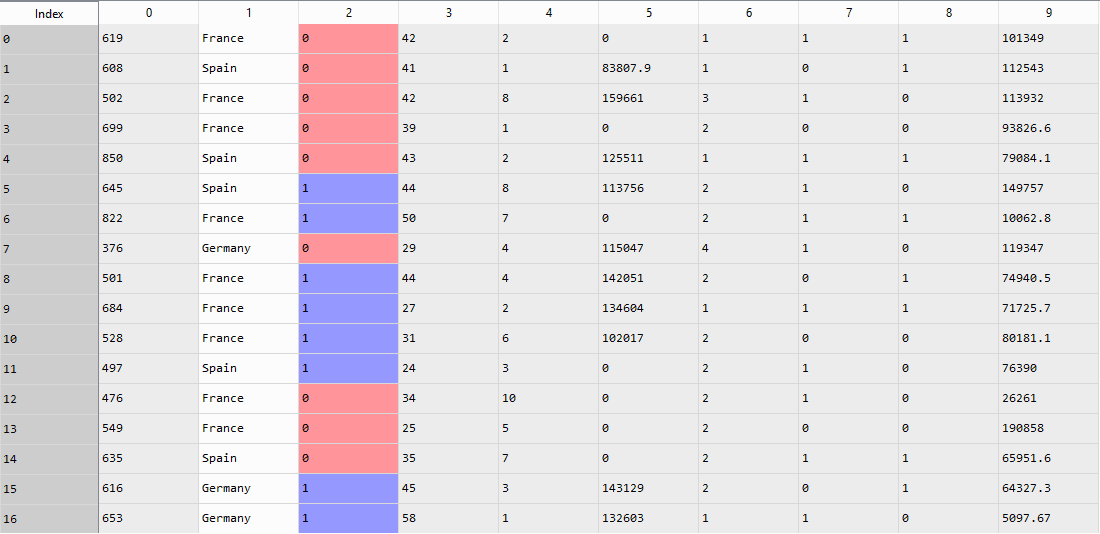

So after performing label encoding on the Gender variable, the male and female are converted in 0 and 1. O represents female and 1 represents the male. Now we have one more categorical variable and that is Geography. Now we will perform One hot encoding to convert France, Spain, and Germany into 0 and 1 form.

In [10]:
labelencoder_X_1 = LabelEncoder()
X.loc[:, 1] = labelencoder_X_1.fit_transform(X.iloc[:, 1])

One hot encoding can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model. 
For Example: Assume we have a sequence of labels with the values 'red' and 'green'. We can assign 'red' an integer value of 0 and 'green' the integer value of 1. As long as we always assign these numbers to these labels, this is called an integer encoding. Here we have France we have 00, Spain we have 01, Germany we have 10 and so on. 
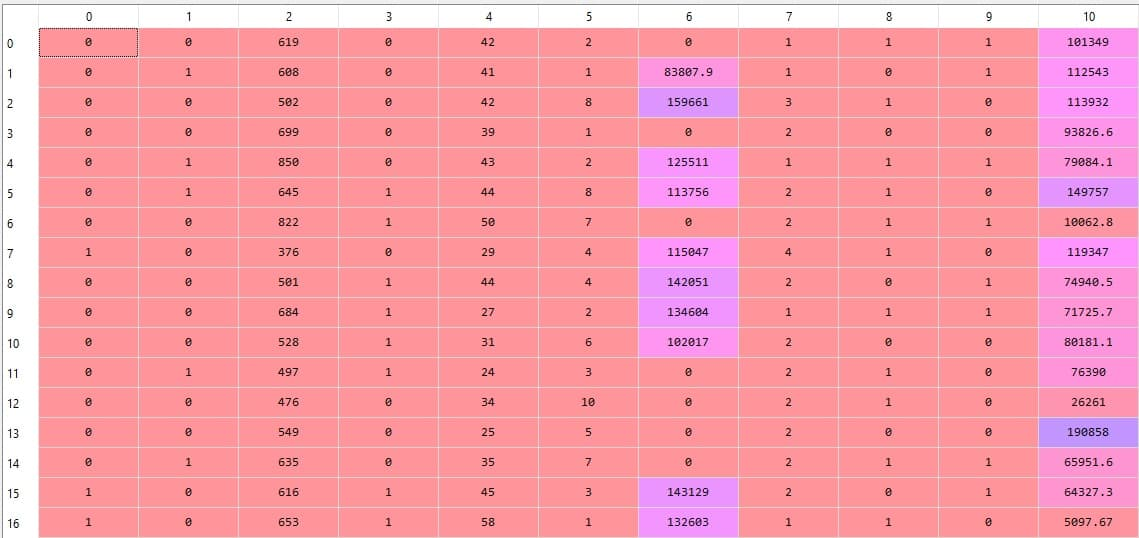

In [11]:
onehotencoder = OneHotEncoder(categories='auto')
labelencoder_X_1 = LabelEncoder()

#onehotencoder = OneHotEncoder(categorical_features = [1])
#labelencoder_X_1 = LabelEncoder()


X.loc[:, 1] = labelencoder_X_1.fit_transform(X.iloc[:, 1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

For building a machine learning model, we need to train our model on the training set. And for checking the performance of our model, we use a Test set. That’s why we have to split the X and Y datasets into the Training set and Test set.

**Split the X and Y Dataset into the Training set and Test set**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#Now we have splitted our dataset into X_train, X_test, y-train, and y_test. 

**Feature scaling**,
as you can see in the dataset, all values are not in the same range especially the Balance and Estimated_salary. and that requires a lot of time for calculation. So to overcome this problem, we perform feature scaling.
Feature scaling help us to normalize the data within a particular range.

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

After performing feature scaling, all values are normalized and looks something like this.
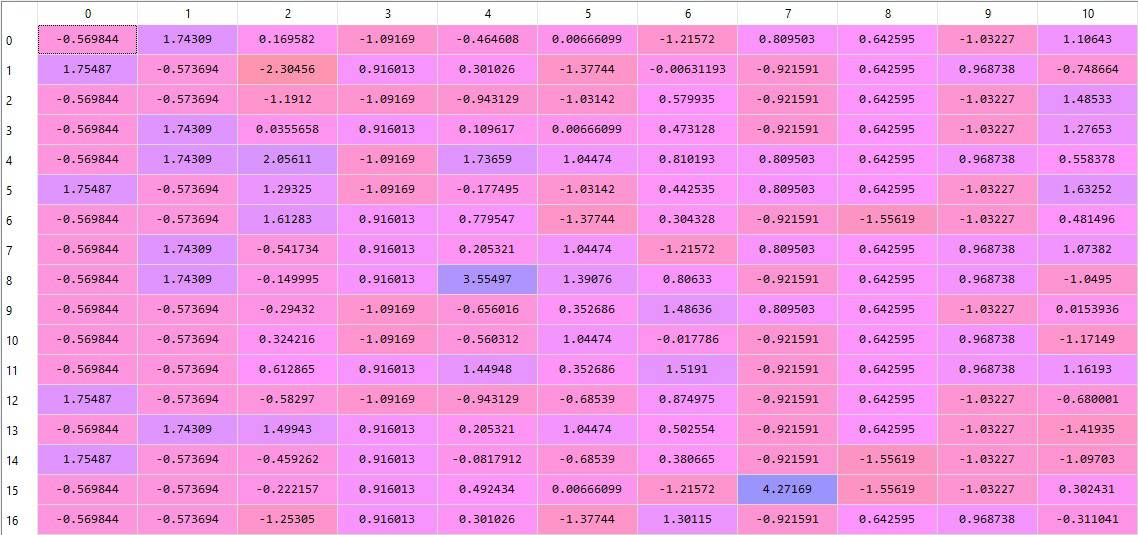

**Build Artificial Neural Network**

In [14]:
#Import the Keras libraries and packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


In [28]:
# Initialize the Artificial Neural Network

classifier = Sequential()

The Sequential class allows us to build ANN but as a sequence of layers. As I told you in the theory part that ANN is built with fully connected layers. 

 Add the input layer and the first hidden layer

In [29]:
classifier.add(Dense(units = 6 , kernel_initializer = 'uniform' , activation = 'relu', input_dim = 11))

#classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

Dense is the famous class in Tensorflow. Dense is used to add fully connected layer in ANN.“add” is the method in the Sequential Class. Here "units" represents the number of hidden neurons in the hidden layer. But there is no rule of for this. You can add or use any number. The activation function in the hidden layer for a fully connected neural network should be the Rectifier Activation function. That’s why I use ‘relu’. 
Our Input layer has 11 neurons. Because, we have total 11 Independent variables. 


In [30]:
#Add the second hidden layer

classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))

Here again, we are using 6 hidden neurons in the second hidden layer. Now we have added one input layer and two hidden layers. It’s time to add our output layer

In [31]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In output layer, we need 1 neuron. Because as you can see in the dataset, we have a dependent variable in Binary form. That means we have to predict in 0 or 1 form. That’s why only one neuron is required in the output layer.
The next thing is Activation Function. In output layer, there should be Sigmoid activation function. Because Sigmoid activation function allows not only predict but also provides the probability of customer leave the bank or not.

**Train the Artificial Neural Network ANN**
The training part requires two steps- Compile the ANN, and Fit the ANN to the Training set. So let’s start with the first step.

In [32]:
#Compile ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Compile is a method of Tensorflow. “adam’ is the optimizer that can perform the stochastic gradient descent. The optimizer updates the weights during training and reduces the loss. 
One thing you need to make sure, when you are doing binary prediction similar to this one, always use loss function as binary_crossentropy.
For evaluating our ANN model, I am gonna use Accuracy metrics. And that’s why metrics = [‘accuracy’]. Now we have compiled our ANN model

In [34]:
#Fit the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 4)
#Instead of comparing our prediction with real results one by one, it’s good to perform in a batch. That’s why I write batch_size = 10.

ValueError: Error when checking input: expected dense_8_input to have shape (11,) but got array with shape (16934,)

In [ ]:
#Predict the Test Set Results

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

y_pred > 0.5 means if y-pred is in between 0 to 0.5, then this new y_pred will become 0(False). And if y_pred is larger than 0.5, then new y_pred will become 1(True).

But can you explain by looking at these predicted values, how many values are predicted right, and how many values are predicted wrong?
y_pred
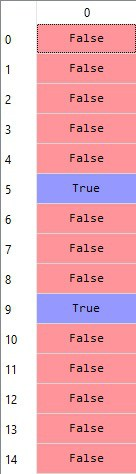

In [ ]:
#For a small dataset, you can. But when we have a large dataset, it’s quite impossible. 
#That’s why I used the confusion matrix, to clear our confusion.
#Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1595    0]
 [ 405    0]]


0.7975

You have successfully built your first Artificial Neural Network. 